In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Importing dataset
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

df.drop('ID', axis = 1,inplace=True)

df.head()
df1=df.copy()
df2=df.copy()



In [3]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

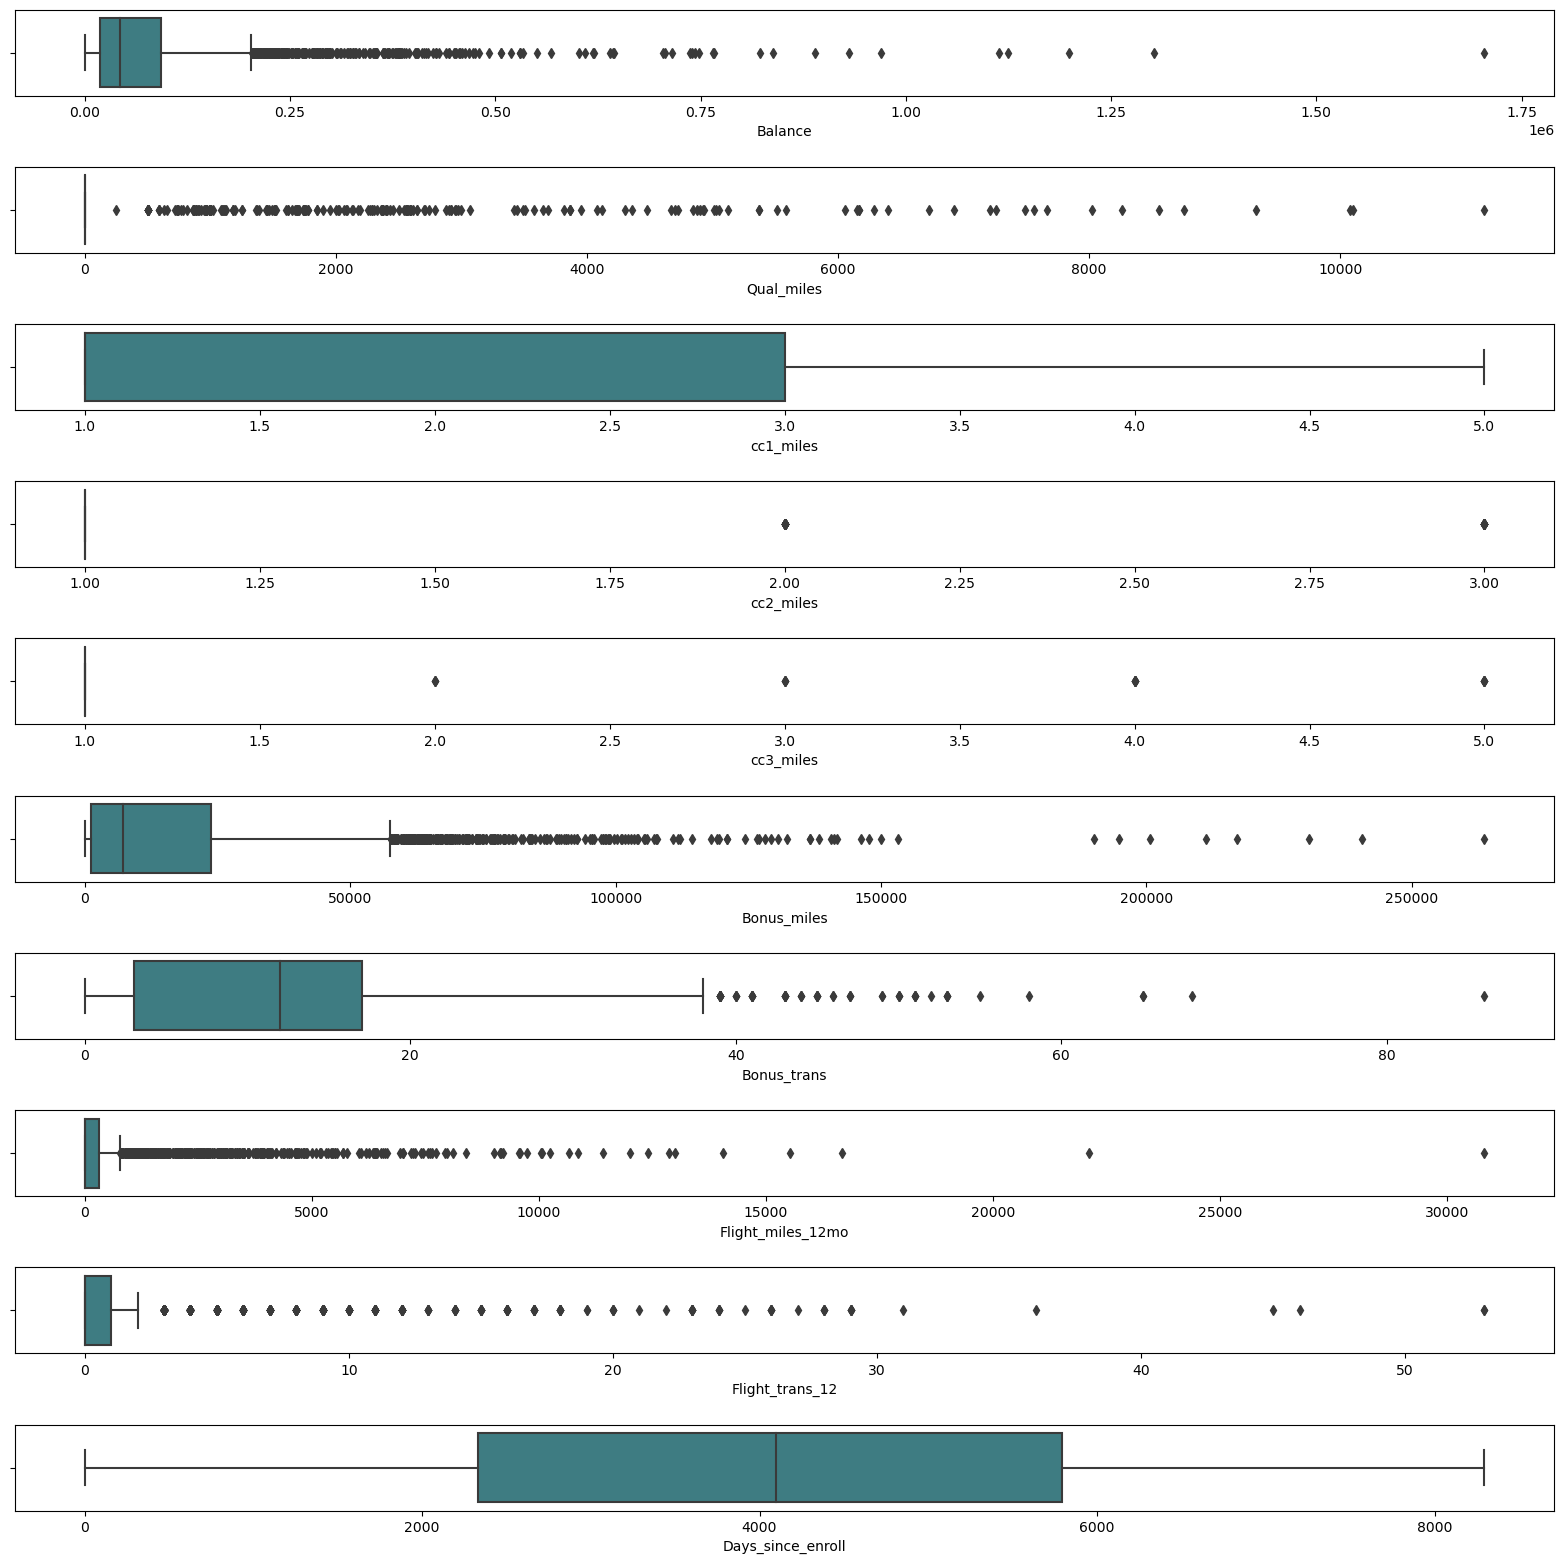

In [4]:
bp=df.copy()
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=bp,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=bp,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=bp,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=bp,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=bp,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=bp,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=bp,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=bp,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=bp,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=bp,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

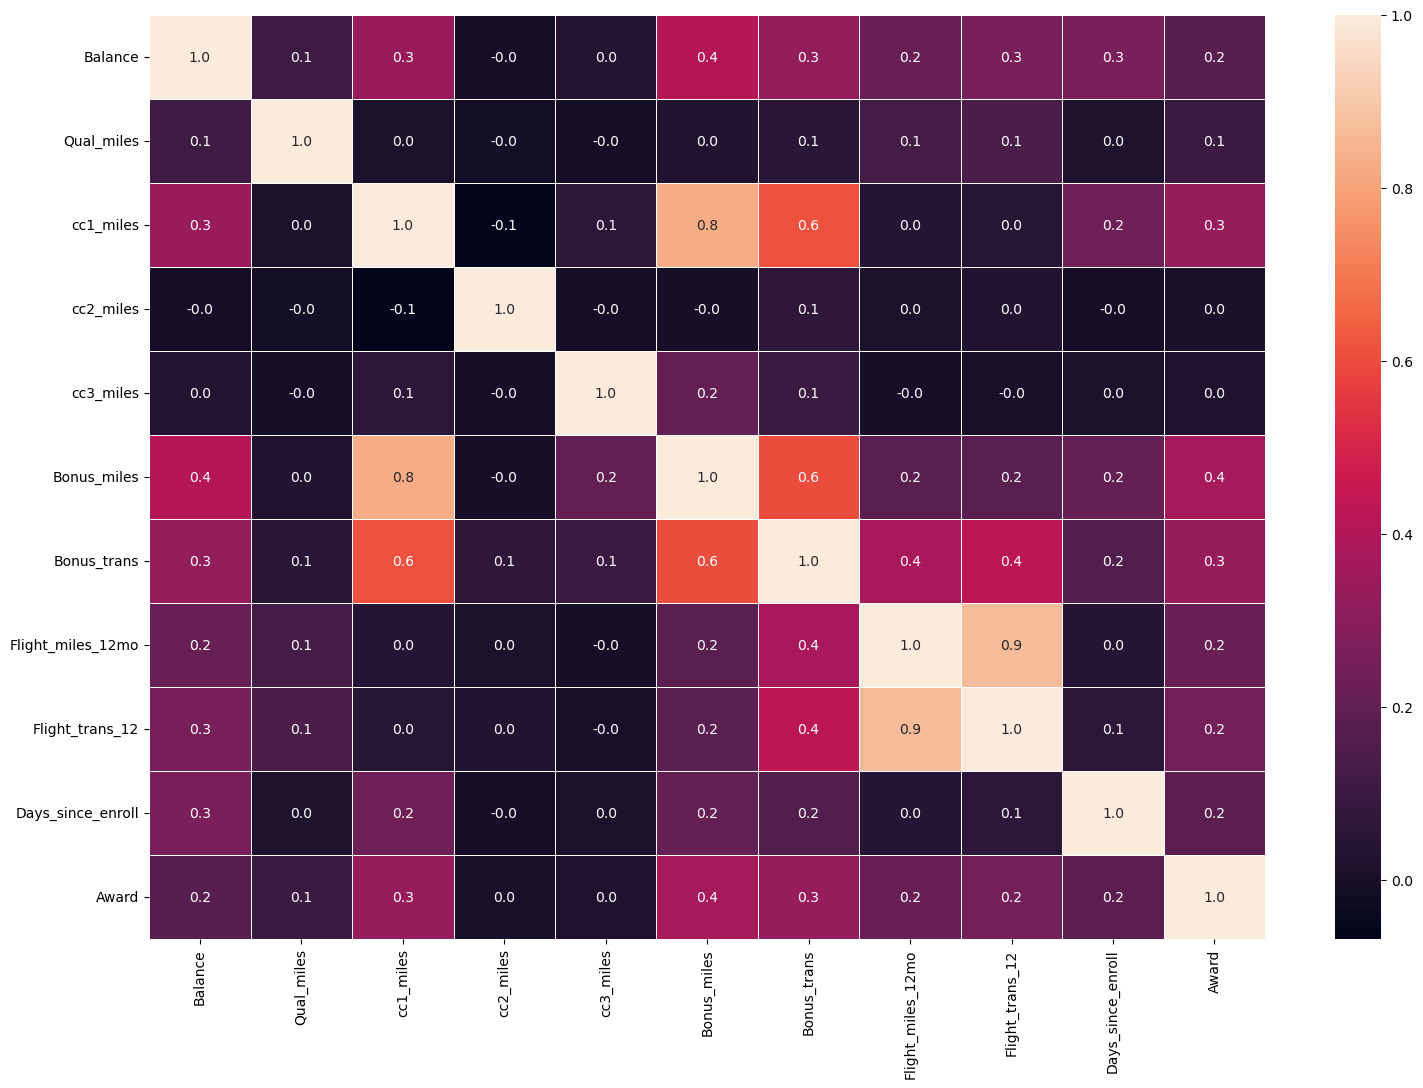

In [5]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

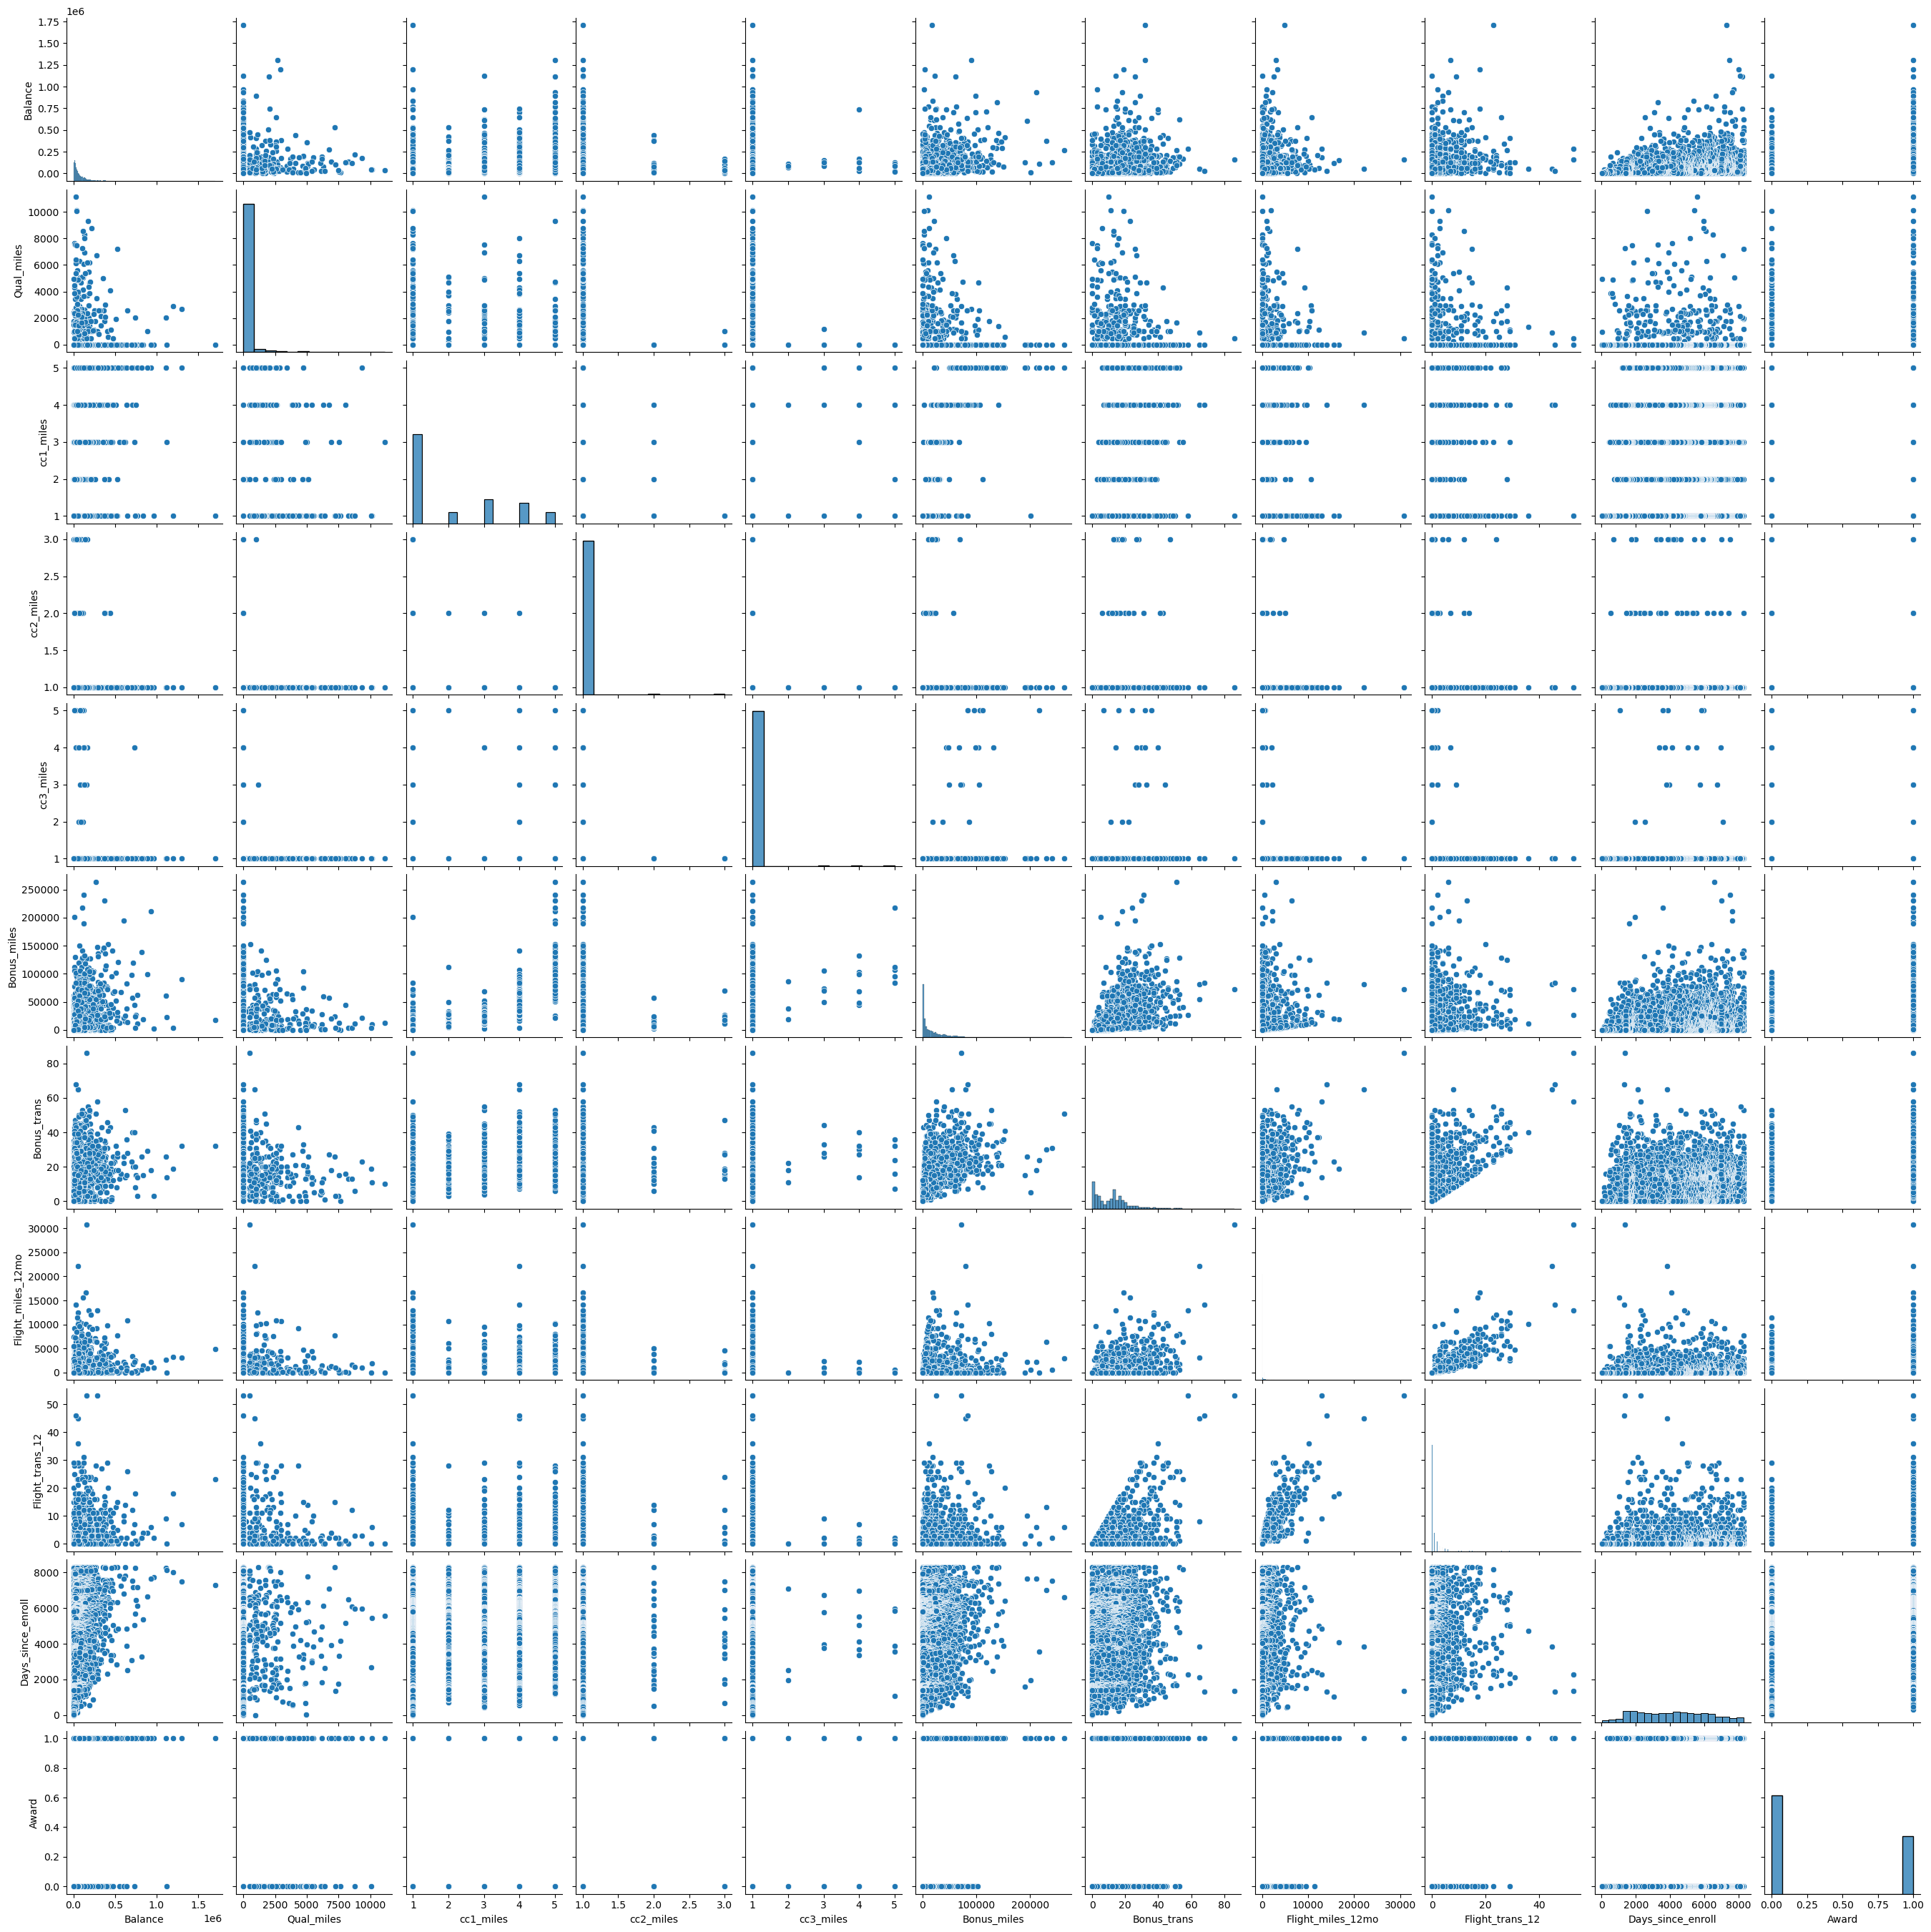

In [6]:
sns.pairplot(df)

In [7]:
list(df)

['Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award']

In [8]:
#Outliers
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = [  "Balance" , "Qual_miles" ,  "cc1_miles"     ,"cc2_miles"   ,"cc3_miles" , "Bonus_miles"  ,"Bonus_trans"  ,"Flight_miles_12mo"  ,"Flight_trans_12","Days_since_enroll","Award"  ]
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = df.copy()
for columns in continuous_columns:
    Q1 = data_without_outliers[columns].quantile(0.25)
    Q3 = data_without_outliers[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[columns] >= lower_whisker_Length) & (data_without_outliers[columns]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)
df = data_without_outliers

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3990    11310           0          1          1          1         5021   
3991    39142           0          3          1          1        14981   
3992    11181           0          1          1          1          929   
3993     3974           0          1          1          1          365   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1      

In [9]:
#Standardizing Data
X=df.iloc[:,:]

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
SS_X=SC.fit_transform(X)
SS_X=pd.DataFrame(SS_X)

SS_X.columns=list(df)

X.isna().sum()



Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [10]:
X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0


In [11]:
SS_X.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.351730,0.0,-0.571271,0.0,0.0,-0.663819,-0.922006,0.0,0.0,1.566499,0.0
1,-0.573510,0.0,-0.571271,0.0,0.0,-0.659907,-0.784064,0.0,0.0,1.551190,0.0
2,-0.022485,0.0,-0.571271,0.0,0.0,-0.287037,-0.508181,0.0,0.0,1.582766,0.0
3,-0.684862,0.0,-0.571271,0.0,0.0,-0.632715,-0.922006,0.0,0.0,1.543535,0.0
4,-0.643890,0.0,-0.571271,0.0,0.0,-0.680421,-1.059947,0.0,0.0,1.538751,0.0


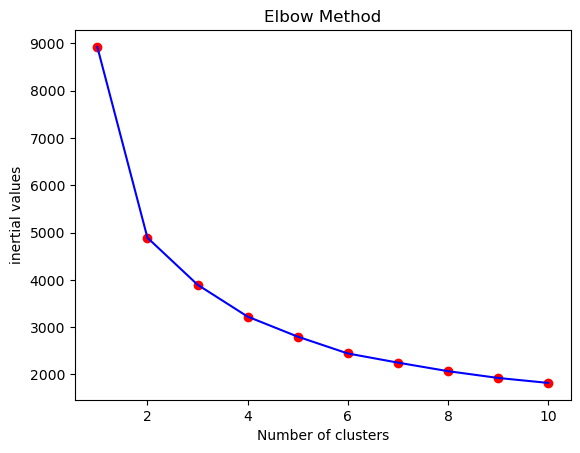

In [12]:
#K Means Method
#Elbow Method
from sklearn.cluster import KMeans
KMeans()

clust = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=10)
    kmeans.fit(SS_X)
    clust.append(kmeans.inertia_)

plt.plot(range(1,11),clust,color="blue")
plt.scatter(range(1, 11), clust,color="red")
plt.xlim()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()

In [13]:
#KMeans Cluster algorithm using K=4
kmeans = KMeans(n_clusters=4,random_state=11)
# Fitting with inputs
Kmeans = kmeans.fit(X)
# Predicting the clusters
cluster_labels = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_

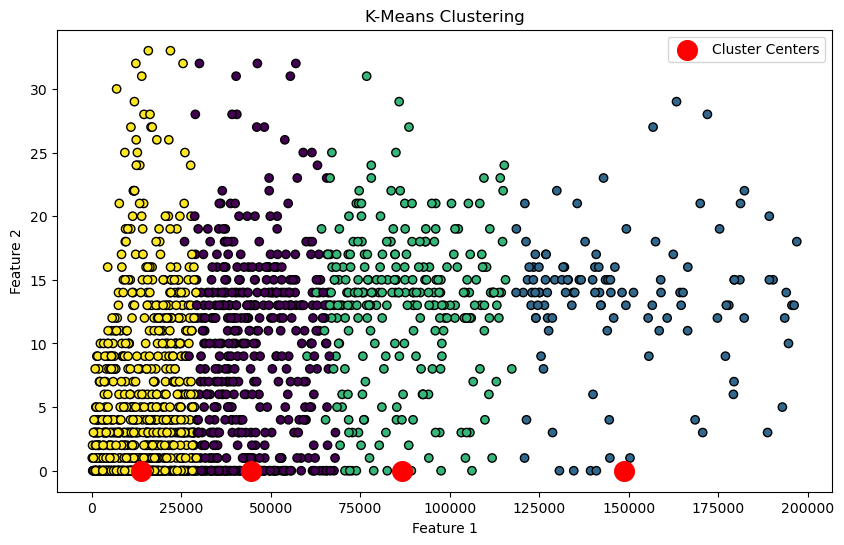

In [14]:
# Create a scatterplot to visualize the K-Means clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 6], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [15]:
cluster_labels = pd.DataFrame(cluster_labels)
cluster_labels.value_counts()
df1['Target1'] = cluster_labels
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Target1
0,28143,0,1,1,1,174,1,0,0,7000,0,3.0
1,19244,0,1,1,1,215,2,0,0,6968,0,3.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0,3.0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3.0


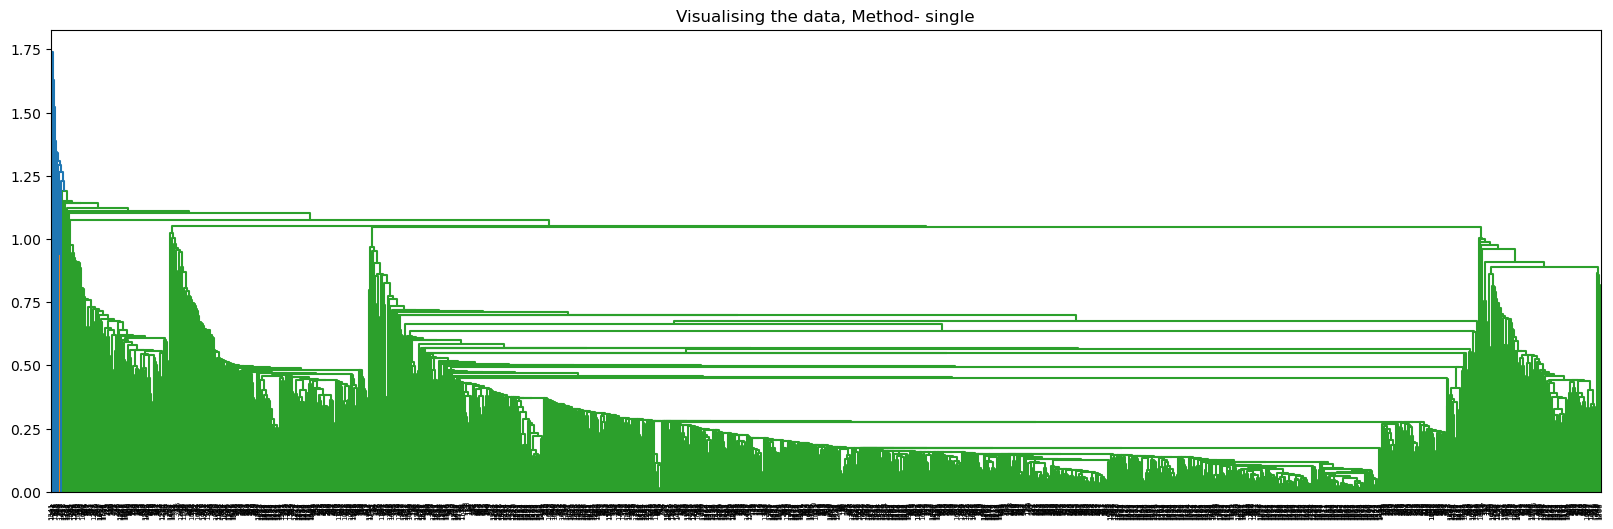

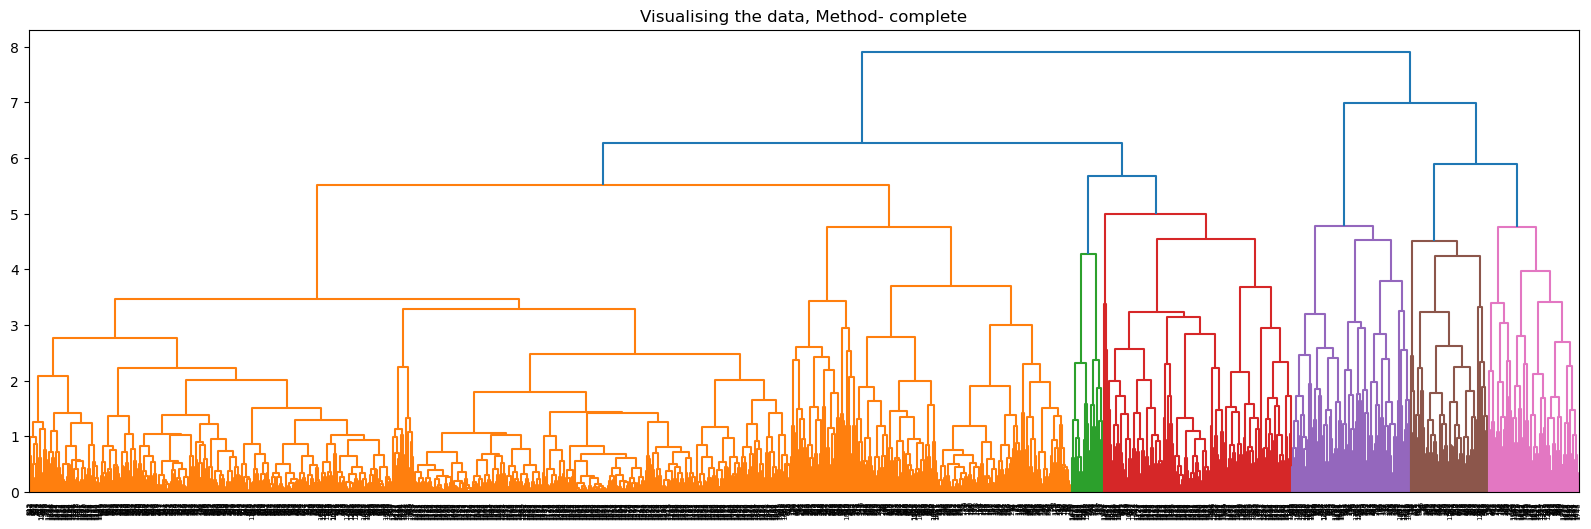

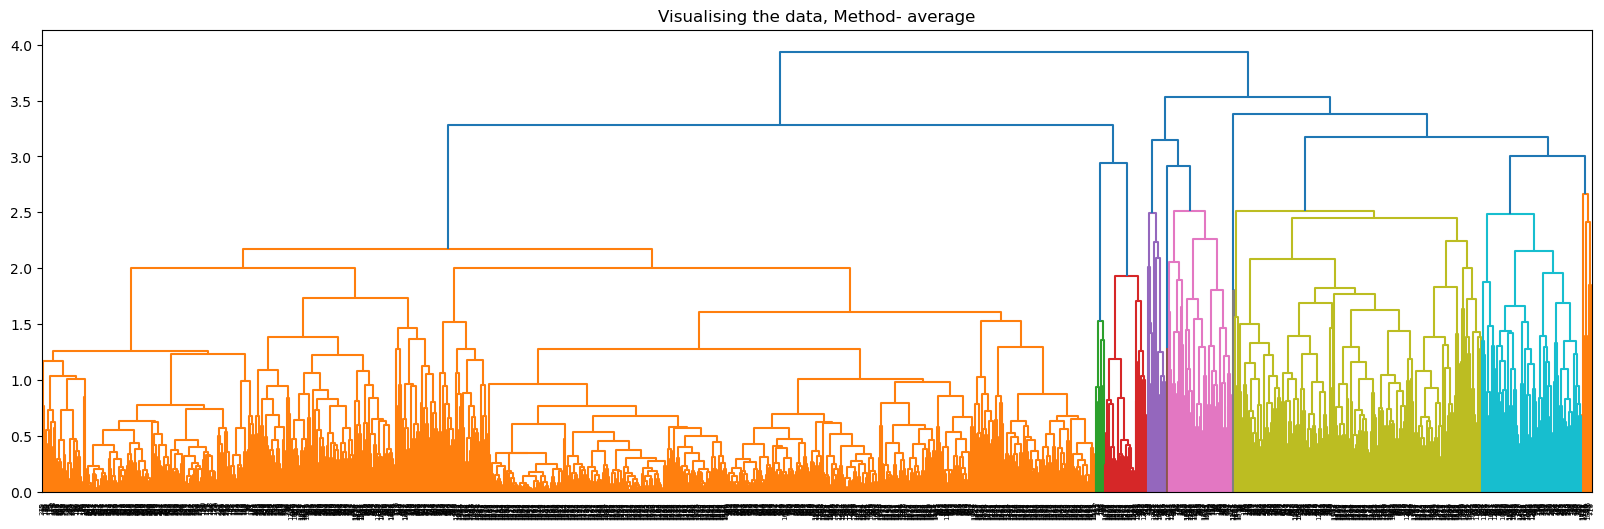

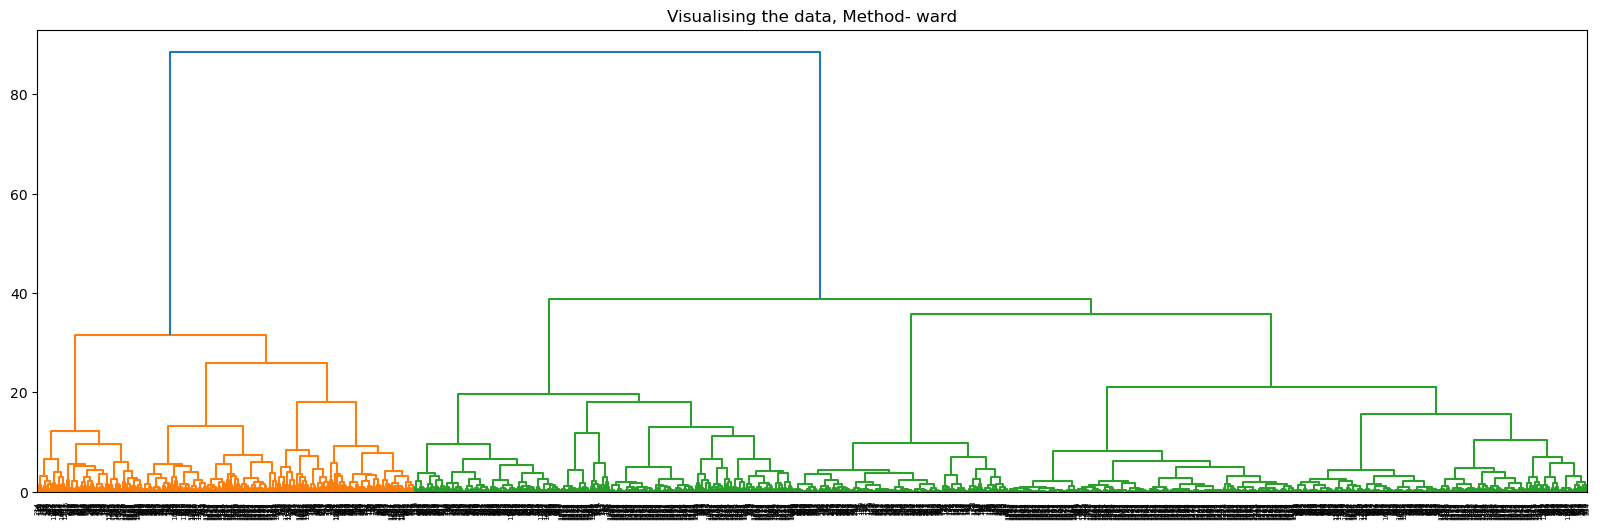

In [16]:
#Agglomeritive Clustering

import scipy.cluster.hierarchy as shc

for methods in ['single','complete','average','ward']:
   plt.figure(figsize =(20, 6))
   plt.title('Visualising the data, Method- {}'.format(methods))
   Dendrogram1 = shc.dendrogram(shc.linkage(SS_X, method = methods,optimal_ordering=False))

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(X)

Y = pd.DataFrame(Y)
Y.value_counts()
df2['Target2'] = Y
df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Target2
0,28143,0,1,1,1,174,1,0,0,7000,0,0.0
1,19244,0,1,1,1,215,2,0,0,6968,0,0.0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
3,14776,0,1,1,1,500,1,0,0,6952,0,0.0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0


In [18]:
#DB Scan
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5, min_samples=3)

db.fit(SS_X)
df["DB_clusters"] = pd.DataFrame(db.labels_)

df["DB_clusters"].value_counts()

DB_clusters
 0.0    670
-1.0      2
Name: count, dtype: int64

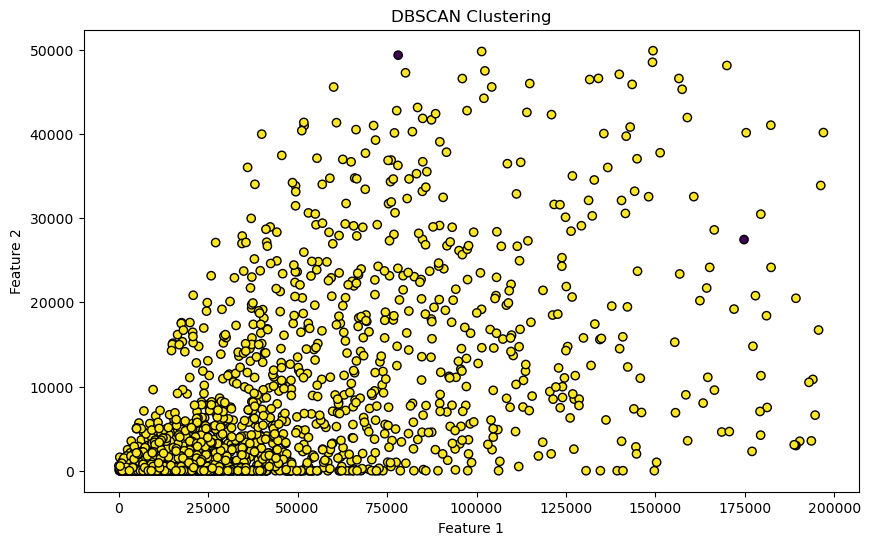

In [19]:
# Create a scatterplot to visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 5], c=db.labels_, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()